In [8]:
##importing the libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread
%matplotlib inline

import string
import spacy

from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [9]:
from wordcloud import WordCloud

TEXT MINING THE ELON DATA SET

In [10]:
#importing the dataset

elon = pd.read_csv(r"C:\Users\91739\Downloads\Elon_musk.csv", encoding='ISO-8859-1')
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [11]:
elon.drop(columns='Unnamed: 0' , inplace=True)
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [12]:
#No. of words in each tweet

elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [13]:
elon['digits'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon.head()

,Text,word_count,digits
0,@kunalb11 Im an alien,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,0
4,@teslacn Congratulations Tesla China for amazi...,17,0


In [14]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

In [15]:
elon['web_links'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head()

,Text,word_count,digits,web_links
0,@kunalb11 Im an alien,4,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0


In [16]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

In [17]:
elon['hashtag'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head()

,Text,word_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0,0


In [18]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

In [19]:
elon = [Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters 
elon = [Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [20]:
# Joining the list into one string/text
elon_text = ' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

Extract reviews of any product from ecommerce website like amazon & Perform emotion mining

In [21]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup as bs

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests

In [24]:
!pip install selenium

  Using cached selenium-4.10.0-py3-none-any.whl (6.7 MB)
  Using cached trio-0.22.2-py3-none-any.whl (400 kB)
  Using cached trio_websocket-0.10.3-py3-none-any.whl (17 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached exceptiongroup-1.1.2-py3-none-any.whl (14 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [25]:
from selenium import webdriver

In [26]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
#importing necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt #graphical representation
import seaborn as sns

import string # special operations on strings
import spacy # language models

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [44]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',

}

In [45]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [46]:
#look for web-tags in our soup, then append our data to reviewList
# Initialize list to store reviews data later on

reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [47]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [48]:
# Save results to a dataframe..
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data

,Rating,Title,Review,Review_Date
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,Reviewed in India 🇮🇳 on 10 February 2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,Reviewed in India 🇮🇳 on 28 June 2023
2,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,Reviewed in India 🇮🇳 on 21 July 2023
3,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 7 July 2023
4,4.0,4.0 out of 5 stars\nWorks fine if you use fine,Bought 2 because I lost first one's case in a...,Reviewed in India 🇮🇳 on 15 July 2023
5,4.0,4.0 out of 5 stars\nQuality,"Build quality is just ok, and sound quality is...",Reviewed in India 🇮🇳 on 21 July 2023
6,4.0,4.0 out of 5 stars\nBoss Airdopes,"Airdopes is great, you can use it. Sometimes ...",Reviewed in India 🇮🇳 on 19 July 2023
7,4.0,4.0 out of 5 stars\nGood product.,If you're low on budget and want a good pair o...,Reviewed in India 🇮🇳 on 24 July 2023
8,4.0,4.0 out of 5 stars\nBoat Air Nice One,"This product sach amazing , sound quality is b...",Reviewed in India 🇮🇳 on 23 July 2023
9,4.0,4.0 out of 5 stars\nNice product,"I use this for both office and personal use , ...",Reviewed in India 🇮🇳 on 21 July 2023


In [49]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,Reviewed in India 🇮🇳 on 10 February 2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,Reviewed in India 🇮🇳 on 28 June 2023
2,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,Reviewed in India 🇮🇳 on 21 July 2023
3,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 7 July 2023
4,4.0,4.0 out of 5 stars\nWorks fine if you use fine,Bought 2 because I lost first one's case in a...,Reviewed in India 🇮🇳 on 15 July 2023


In [50]:
# Removing 'Reviewed in India 🇮🇳 on '

Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 452.0+ bytes


In [52]:
data.Rating.describe()

count    10.000000
mean      3.900000
std       0.316228
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: Rating, dtype: float64

In [53]:
data.Review.isna().sum()

0

In [54]:
#for those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])


#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)


data['Review_Date']= review_date[1:]

In [55]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737
1,4.0,i purchased it in the month of january 2023 an...,192
2,4.0,My suggestion is to buy this product in heavy ...,54
3,4.0,The media could not be loaded.\n ...,169
4,4.0,Bought 2 because I lost first one's case in a...,95


In [56]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328
1,4.0,i purchased it in the month of january 2023 an...,192,96
2,4.0,My suggestion is to buy this product in heavy ...,54,20
3,4.0,The media could not be loaded.\n ...,169,39
4,4.0,Bought 2 because I lost first one's case in a...,95,35


In [58]:
#no.of digits

data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3
1,4.0,i purchased it in the month of january 2023 an...,192,96,6
2,4.0,My suggestion is to buy this product in heavy ...,54,20,0
3,4.0,The media could not be loaded.\n ...,169,39,4
4,4.0,Bought 2 because I lost first one's case in a...,95,35,4


In [59]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0
1,4.0,i purchased it in the month of january 2023 an...,192,96,6,0
2,4.0,My suggestion is to buy this product in heavy ...,54,20,0,0
3,4.0,The media could not be loaded.\n ...,169,39,4,0
4,4.0,Bought 2 because I lost first one's case in a...,95,35,4,0


In [60]:
data.web_links.value_counts()
#no weblinks

0    10
Name: web_links, dtype: int64

In [61]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0,0
1,4.0,i purchased it in the month of january 2023 an...,192,96,6,0,0
2,4.0,My suggestion is to buy this product in heavy ...,54,20,0,0,0
3,4.0,The media could not be loaded.\n ...,169,39,4,0,0
4,4.0,Bought 2 because I lost first one's case in a...,95,35,4,0,0


In [62]:
data.hashtag.value_counts()
# for hashtagscount

0    10
Name: hashtag, dtype: int64

In [63]:
data['date'] = data['Review_Date'].str.split(' ').str[0]
data['Month'] = data['Review_Date'].str.split(' ').str[1]
data['Year'] = data['Review_Date'].str.split(' ').str[2]
data[['Review_Date', 'date', 'Month', 'Year']]

,Review_Date,date,Month,Year
0,10 February 2023,10,February,2023
1,28 June 2023,28,June,2023
2,21 July 2023,21,July,2023
3,7 July 2023,7,July,2023
4,15 July 2023,15,July,2023
5,21 July 2023,21,July,2023
6,19 July 2023,19,July,2023
7,24 July 2023,24,July,2023
8,23 July 2023,23,July,2023
9,21 July 2023,21,July,2023


In [64]:
#keeping useful columns and droppping others for the moment
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1

,Rating,Title,Review,date,Month,Year
0,3.0,3.0 out of 5 stars\nA overall good product but...,I have tried several earbuds in the <1500Rs pr...,10,February,2023
1,4.0,4.0 out of 5 stars\nfuture problems probably c...,i purchased it in the month of january 2023 an...,28,June,2023
2,4.0,4.0 out of 5 stars\nGOOD SOUND QUALITY IN THIS...,My suggestion is to buy this product in heavy ...,21,July,2023
3,4.0,4.0 out of 5 stars\nGood for casual music purpose,The media could not be loaded.\n ...,7,July,2023
4,4.0,4.0 out of 5 stars\nWorks fine if you use fine,Bought 2 because I lost first one's case in a...,15,July,2023
5,4.0,4.0 out of 5 stars\nQuality,"Build quality is just ok, and sound quality is...",21,July,2023
6,4.0,4.0 out of 5 stars\nBoss Airdopes,"Airdopes is great, you can use it. Sometimes ...",19,July,2023
7,4.0,4.0 out of 5 stars\nGood product.,If you're low on budget and want a good pair o...,24,July,2023
8,4.0,4.0 out of 5 stars\nBoat Air Nice One,"This product sach amazing , sound quality is b...",23,July,2023
9,4.0,4.0 out of 5 stars\nNice product,"I use this for both office and personal use , ...",21,July,2023


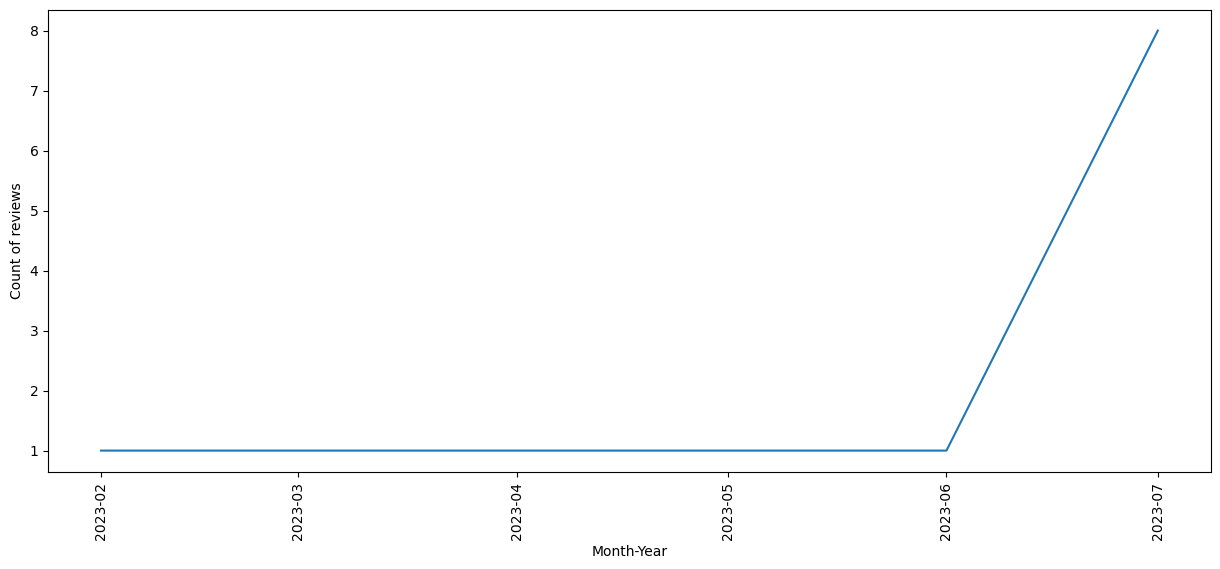

In [71]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year']
a = pd.DataFrame(data['Mo_Year'].value_counts() )
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True)

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'})
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show()

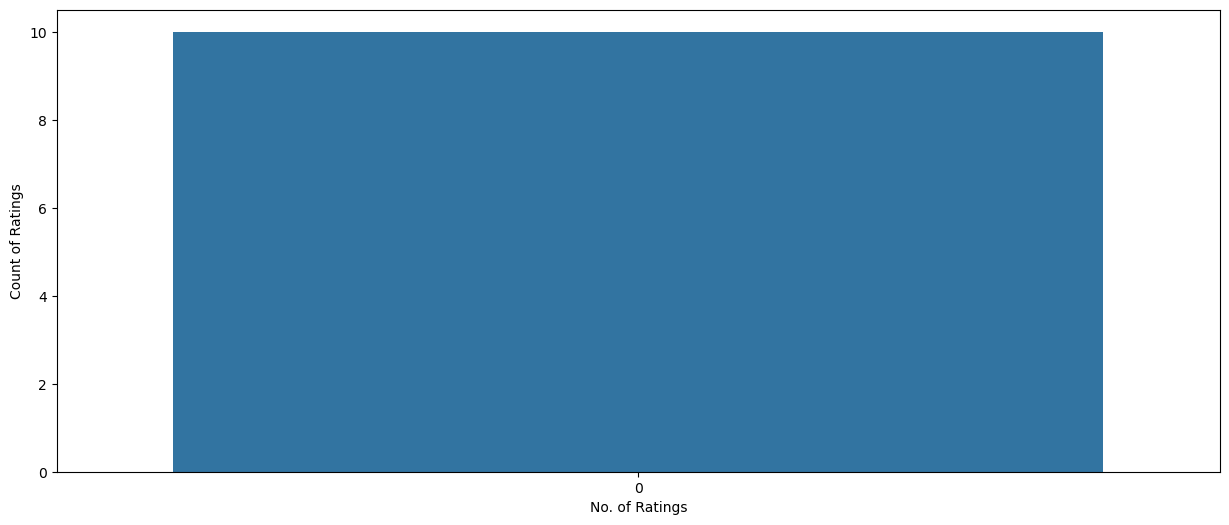

In [73]:
#Reviews by Stars
plt.figure(figsize=(15,6))
sns.countplot(data1.Rating)
plt.xlabel('No. of Ratings')
plt.ylabel('Count of Ratings')
plt.show()

In [74]:
#Keeping features which are imp for time being
data2 = data1[['Review']]
data2

,Review
0,I have tried several earbuds in the <1500Rs pr...
1,i purchased it in the month of january 2023 an...
2,My suggestion is to buy this product in heavy ...
3,The media could not be loaded.\n ...
4,Bought 2 because I lost first one's case in a...
5,"Build quality is just ok, and sound quality is..."
6,"Airdopes is great, you can use it. Sometimes ..."
7,If you're low on budget and want a good pair o...
8,"This product sach amazing , sound quality is b..."
9,"I use this for both office and personal use , ..."


In [75]:
#Removing punctuations, digits, emogies and normalising reviews

import re
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL

    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits

    corpus.append(review)

In [76]:
corpus

['i have tried several earbuds in the rs price segment and without a doubt it is a good earbud for the price you pay but it has its own set of pros and cons so without further ado the pros and the cons of the product according to me are  marked points are important featuresdownsides of this earphonepros sound and bass the sound and bass of this earbud are exceptionally good for the price the sound and the bass can even be tuned by an eq to suit your audio needs from your phone but in windows i still havent found a way to change eq without using some third party software waterproof yes it is water proof but up to a certain water level and for a certain duration design this point is debatable for this earbud because of its large upper part though it sits comfortably in your ear but it has a tendency to come loose due to certain jerking of the head battery backup of each earbud by far the best thing for this earbud the battery backup is impressive even after using it for hrs at  volume th

# Text cleaning

In [77]:
data2['clean_reviews'] = corpus
data2

,Review,clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...
2,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...
3,The media could not be loaded.\n ...,the media could not be loaded\n ...
4,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...
5,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...
6,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...
7,If you're low on budget and want a good pair o...,if youre low on budget and want a good pair of...
8,"This product sach amazing , sound quality is b...",this product sach amazing sound quality is be...
9,"I use this for both office and personal use , ...",i use this for both office and personal use i...


Cleaning the reviews by removing the stop words, tokenization and lemmatization

In [78]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):

    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]

    clean_reviews.append(' '.join(words_without_stopwords))

data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds rs price segment without...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...,purchased month january im writing review righ...
2,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...,suggestion buy product heavy discount rest pro...
3,The media could not be loaded.\n ...,the media could not be loaded\n ...,media could loaded let keep simple tons review...
4,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...,bought lost first ones case cabbest easy fast ...
5,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...,build quality ok sound quality good id rather ...
6,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...,airdopes great use sometimes problem time call...
7,If you're low on budget and want a good pair o...,if youre low on budget and want a good pair of...,youre low budget want good pair earbuds product
8,"This product sach amazing , sound quality is b...",this product sach amazing sound quality is be...,product sach amazing sound quality best physic...
9,"I use this for both office and personal use , ...",i use this for both office and personal use i...,use office personal use instantly connect one ...


In [79]:
#Tokenisation
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [tried, several, earbuds, rs, price, segment, ...
1    [purchased, month, january, im, writing, revie...
2    [suggestion, buy, product, heavy, discount, re...
3    [media, could, loaded, let, keep, simple, tons...
4    [bought, lost, first, ones, case, cabbest, eas...
5    [build, quality, ok, sound, quality, good, id,...
6    [airdopes, great, use, sometimes, problem, tim...
7    [youre, low, budget, want, good, pair, earbuds...
8    [product, sach, amazing, sound, quality, best,...
9    [use, office, personal, use, instantly, connec...
Name: absolute_clean_reviews, dtype: object

In [80]:
#lemmatisation
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [tried, several, earbuds, r, price, segment, w...
1    [purchased, month, january, im, writing, revie...
2    [suggestion, buy, product, heavy, discount, re...
3    [medium, could, loaded, let, keep, simple, ton...
4    [bought, lost, first, one, case, cabbest, easy...
5    [build, quality, ok, sound, quality, good, id,...
6    [airdopes, great, use, sometimes, problem, tim...
7    [youre, low, budget, want, good, pair, earbuds...
8    [product, sach, amazing, sound, quality, best,...
9    [use, office, personal, use, instantly, connec...
Name: absolute_clean_reviews, dtype: object

In [81]:
#joining tokens into sentence
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds r price segment without ...
1,i purchased it in the month of january 2023 an...,i purchased it in the month of january and im...,purchased month january im writing review righ...
2,My suggestion is to buy this product in heavy ...,my suggestion is to buy this product in heavy ...,suggestion buy product heavy discount rest pro...
3,The media could not be loaded.\n ...,the media could not be loaded\n ...,medium could loaded let keep simple ton review...
4,Bought 2 because I lost first one's case in a...,bought because i lost first ones case in a c...,bought lost first one case cabbest easy fast c...
5,"Build quality is just ok, and sound quality is...",build quality is just ok and sound quality is ...,build quality ok sound quality good id rather ...
6,"Airdopes is great, you can use it. Sometimes ...",airdopes is great you can use it sometimes th...,airdopes great use sometimes problem time call...
7,If you're low on budget and want a good pair o...,if youre low on budget and want a good pair of...,youre low budget want good pair earbuds product
8,"This product sach amazing , sound quality is b...",this product sach amazing sound quality is be...,product sach amazing sound quality best physic...
9,"I use this for both office and personal use , ...",i use this for both office and personal use i...,use office personal use instantly connect one ...


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)
print(vectorizer.vocabulary_)

{'tried': 342, 'several': 299, 'earbuds': 106, 'price': 251, 'segment': 294, 'without': 367, 'doubt': 99, 'good': 144, 'earbud': 105, 'pay': 234, 'set': 297, 'pro': 252, 'con': 68, 'ado': 5, 'product': 255, 'according': 2, 'marked': 197, 'point': 246, 'important': 166, 'featuresdownsides': 132, 'earphonepros': 108, 'sound': 314, 'bass': 24, 'exceptionally': 123, 'even': 121, 'tuned': 346, 'eq': 117, 'suit': 322, 'audio': 17, 'need': 212, 'phone': 239, 'window': 366, 'still': 319, 'havent': 150, 'found': 136, 'way': 361, 'change': 51, 'using': 353, 'third': 335, 'party': 233, 'software': 310, 'waterproof': 360, 'yes': 376, 'water': 359, 'proof': 256, 'certain': 50, 'level': 184, 'duration': 102, 'design': 89, 'debatable': 84, 'large': 180, 'upper': 348, 'part': 232, 'though': 337, 'sits': 307, 'comfortably': 65, 'ear': 104, 'tendency': 330, 'come': 64, 'loose': 191, 'due': 101, 'jerking': 175, 'head': 151, 'battery': 25, 'backup': 22, 'far': 129, 'best': 26, 'thing': 334, 'impressive': 

In [85]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
count_df

,airdopes,also,bass,battery,buy,case,earbuds,fast,good,hour,...,place,price,problem,product,quality,small,sound,sound quality,time,use
0,0,5,5,9,1,13,8,3,3,3,...,2,3,1,2,1,1,7,0,4,1
1,0,0,1,1,1,1,0,1,2,0,...,1,0,4,1,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,3,1,1,0,0,0,0
3,1,0,1,3,0,0,1,0,3,1,...,1,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,1,1,2,...,0,2,0,0,1,0,1,0,1,1
5,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,2,0,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
7,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
9,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,2


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
count_df_tf_idf

,aac,aac codec,aac codec rapidly,aac codecs,aac codecs switching,able,able charge,able charge earphone,according,according marked,...,year,yes,yes water,yes water proof,youconclusion,youconclusion conclusion,youconclusion conclusion would,youre,youre low,youre low budget
0,0.049244,0.024622,0.024622,0.024622,0.024622,0.024622,0.024622,0.024622,0.024622,0.024622,...,0.000000,0.024622,0.024622,0.024622,0.024622,0.024622,0.024622,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.082689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232193,0.232193,0.232193
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Sentiment Analysis

In [88]:
afinn = pd.read_csv(r"C:\Users\91739\Downloads\Afinn.csv", sep=',', encoding='latin-1')
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0
for i in range(0,len(data2)):

    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):

        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a)
    a = 0
data2['sentiment_value'] = sent
data2[['absolute_clean_reviews', 'sentiment_value']]

,absolute_clean_reviews,sentiment_value
0,tried several earbuds r price segment without ...,21
1,purchased month january im writing review righ...,5
2,suggestion buy product heavy discount rest pro...,7
3,medium could loaded let keep simple ton review...,20
4,bought lost first one case cabbest easy fast c...,4
5,build quality ok sound quality good id rather ...,7
6,airdopes great use sometimes problem time call...,-1
7,youre low budget want good pair earbuds product,4
8,product sach amazing sound quality best physic...,7
9,use office personal use instantly connect one ...,3


In [89]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]

,absolute_clean_reviews,sentiment_value,sentiment
0,tried several earbuds r price segment without ...,21,Positive
1,purchased month january im writing review righ...,5,Positive
2,suggestion buy product heavy discount rest pro...,7,Positive
3,medium could loaded let keep simple ton review...,20,Positive
4,bought lost first one case cabbest easy fast c...,4,Positive
5,build quality ok sound quality good id rather ...,7,Positive
6,airdopes great use sometimes problem time call...,-1,Negative
7,youre low budget want good pair earbuds product,4,Positive
8,product sach amazing sound quality best physic...,7,Positive
9,use office personal use instantly connect one ...,3,Positive


In [90]:
data2.sentiment.value_counts()

Positive    9
Negative    1
Name: sentiment, dtype: int64

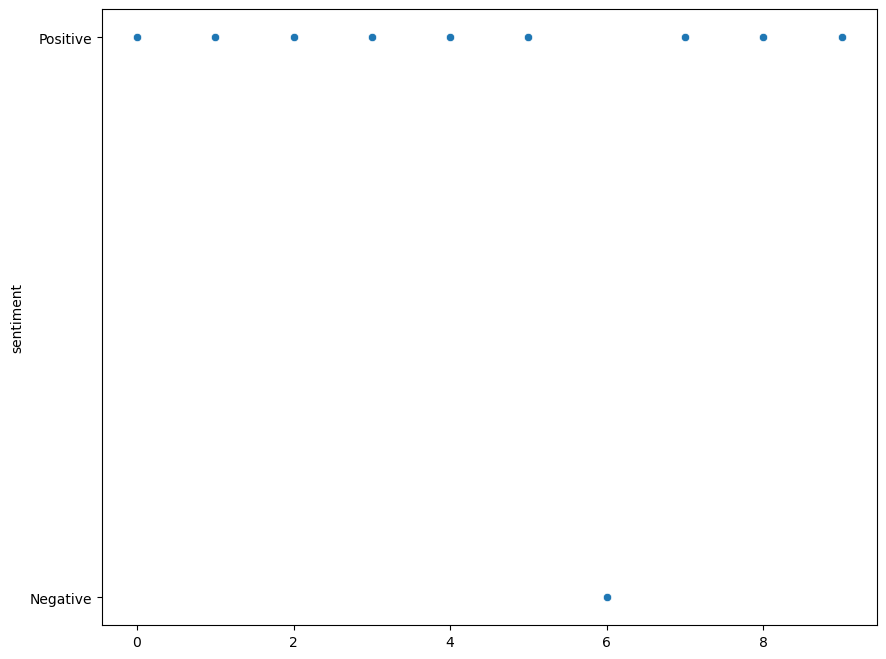

In [98]:
plt.figure(figsize=(10,8))
sns.scatterplot(data2.sentiment)
plt.show()

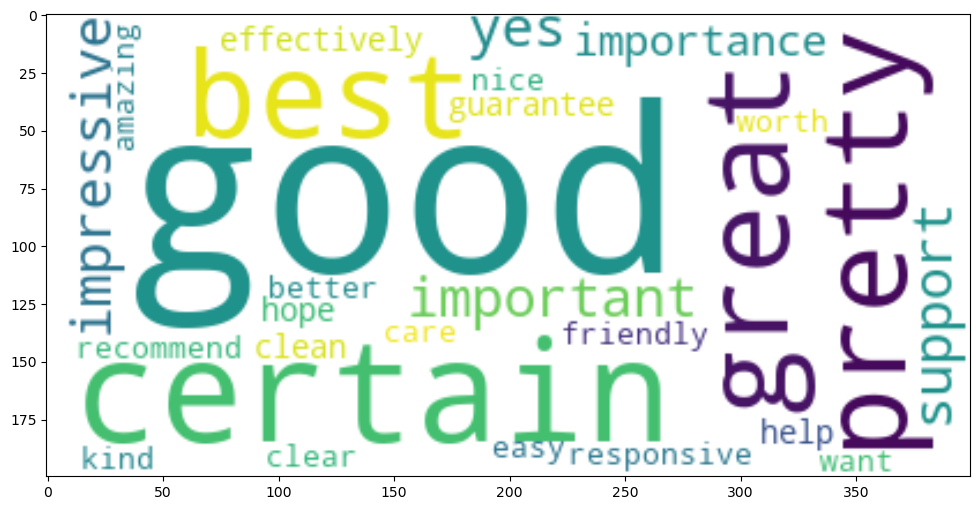

In [99]:
positive = []
negative = []
neutral = []
for i in range(0,len(data2)):

    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):

        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0:
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)

pos =' '.join(positive)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear')


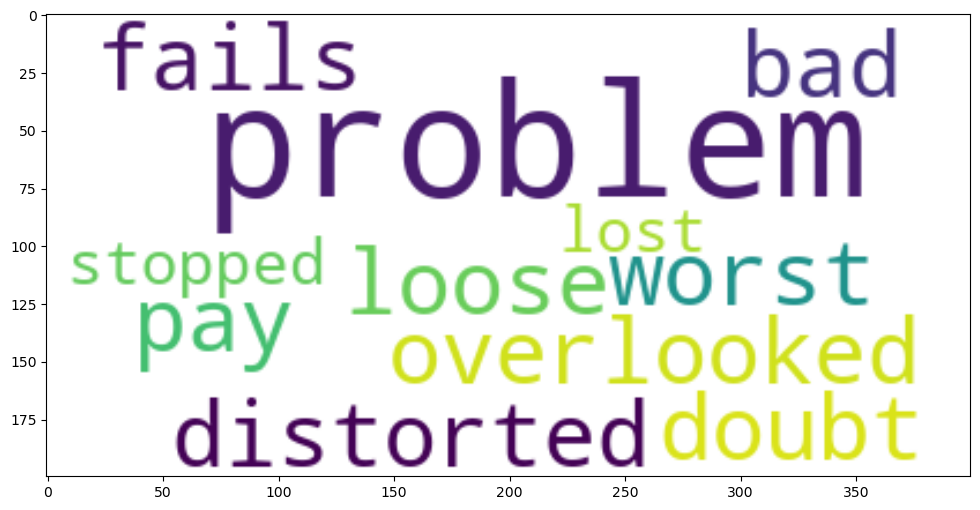

In [100]:
#Negative words

neg = ' '.join(negative)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

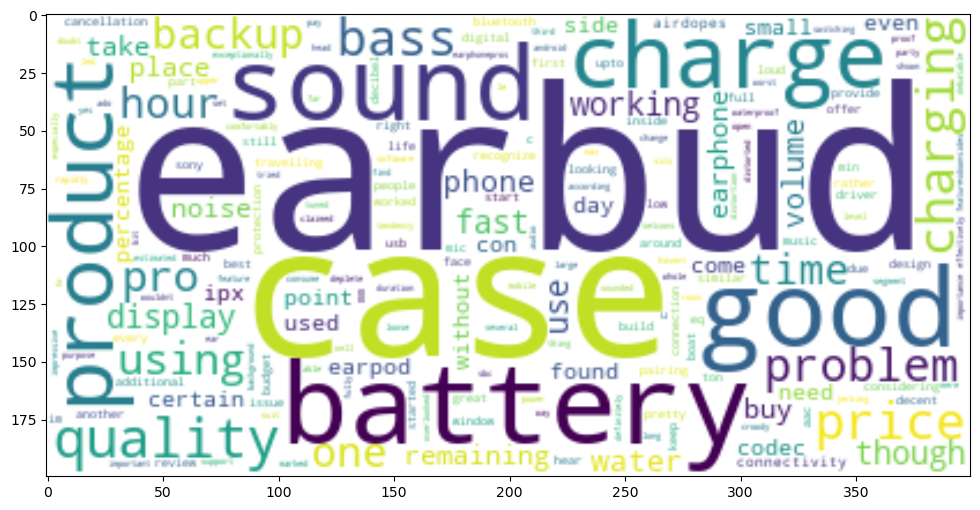

In [101]:
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear')